Here is a simple electronic circuit with one resistor and one capacitor.

<div>
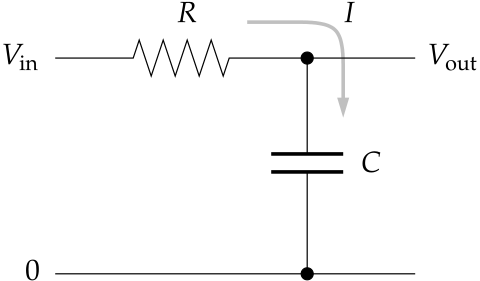
</div>


This circuit acts as a low-pass filter: you send a signal in on the left
and it comes out filtered on the right.

Using Ohm's law and the capacitor law and assuming that the output load has
very high impedance, so that a negligible amount of current flows through
it, we can write down the equations governing this circuit as follows.  Let
$I$ be the current that flows through~$R$ and into the capacitor, and let
$Q$ be the charge on the capacitor.  Then:

$$
IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
 Q = CV_\textrm{out}\,,\qquad
 I = \frac{dQ}{d t}.
$$

Substituting the second equation into the third, then substituting the
result into the first equation, we find that $V_\textrm{in} -
V_\textrm{out} = RC\>(d V_\textrm{out}/dt)$, or equivalently

$$
\frac{d V_\textrm{out}}{dt} = {1\over RC}
                               \bigl( V_\textrm{in} - V_\textrm{out} \bigr).
$$

Write a program to solve this equation for $V_\textrm{out}(t)$ using the fourth-order 
Runge--Kutta method when the input signal is a square-wave with frequency $1$ and amplitude $1$:

\begin{equation}
V_\textrm{in}(t) = \begin{cases}
                     1  & \qquad\mbox{if $\lfloor 2t \rfloor$ is even,} \\
                     -1 & \qquad\mbox{if $\lfloor 2t \rfloor$ is odd,}
                   \end{cases}
\end{equation}

$\lfloor x\rfloor$ means $x$ rounded down to the next lowest integer. Use the program to make plots of the output of the filter circuit from $t=0$ to $t=10$ when $RC=0.03$, $0.15$, and $0.75$, with initial condition $V_\textrm{out}(0)=0$.  You should put all three plots in one graph.
You will have to make a decision about what value of $h$ to use in your calculation. Because you need to solve the system of ODE for three values for $RC$, put your vector function $\mathbf{f}$ in a class, as you saw in the lectures.

A program similar to the one you wrote is running inside most stereos and
music players, to create the effect of the "bass" control.  In the old
days, the bass control on a stereo would have been connected to a real
electronic low-pass filter in the amplifier circuitry, but these days there
is just a computer processor that simulates the behavior of the filter in a
manner similar to your program.

(array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.997e+00, 9.998e+00,
       9.999e+00]), array([[ 0.        ,  0.0327839 ,  0.06449301, ..., -0.99999987,
        -0.99999988, -0.99999988]]))
(array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.997e+00, 9.998e+00,
       9.999e+00]), array([[ 0.        ,  0.0327839 ,  0.06449301, ..., -0.99999987,
        -0.99999988, -0.99999988]]))


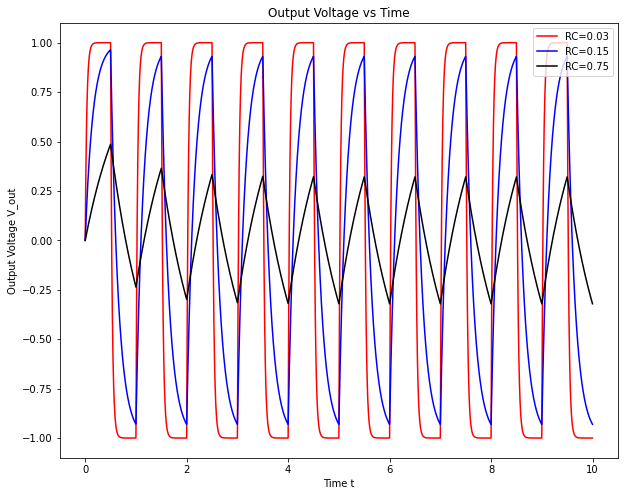

In [1]:
from numpy import arange, empty, array
from math import floor
import matplotlib.pyplot as plt

def RK4(f, ti, tf, h, yinit):
    '''
    Implements the fourth order Runge Kutta method for solving an initial value
      problem for a system of n ordinary differential equations. f is the vector
      function, ti and tf are the initial and final times, respectively, h is the
      step size, and yinit are the initial conditions.
    
    RK4: Func Float Float Float List(Float(s)) -> Array
    requires: ti < tf
    
    Example
    -------
    dy/dt = 5*y(t), y(0) = 0
    
    def f(t, y):
        return array([5*y[0]])
        
    RK4(f, 0.0, 1.0, 0.5, [0.0]) returns an array:
     index 0 is time values
     index [1][0] are values of y(t)
     index [1][1] are values of y'(t)
    '''   
    Nsteps = int((tf - ti)/h) # number of steps
    t = h * arange(Nsteps) # grid for the independent variable   
    y = empty([len(yinit), len(t)]) #(n, Nstep) array for the dependent variable.
    ys = array(yinit) #ys is a n-dim buffer array. Set it to the initial conditions.

    for i, ts in enumerate(t): # RK4 integrator
        y[:,i] = ys
        k1 = h*f(ts, ys)
        k2 = h*f(ts +0.5*h, ys +0.5*k1)
        k3 = h*f(ts +0.5*h, ys +0.5*k2)
        k4 = h*f(ts +h, ys +k3)
        ys += (k1+ 2*k2+ 2*k3 +k4)/6
    return t, y

class LowPassFilter:
    def __init__(self, RC, V_in=1):
        self.RC = RC
    
    def f(self, t, y):
        if (floor(2*t) % 2 == 0): ## if statements for piecewise function of V_in
            self.V_in = 1
        if (floor(2*t) % 2 == 1):
            self.V_in = -1
        
        return array([(self.V_in - y[0])/self.RC])

lpf1 = LowPassFilter(0.03, 1)
lpf2 = LowPassFilter(0.15, 1)
lpf3 = LowPassFilter(0.75, 1)

init_cond = [0.0]

V_out1 = RK4(lpf1.f, 0.0, 10.0, 0.001, init_cond)
V_out2 = RK4(lpf2.f, 0.0, 10.0, 0.001, init_cond)
V_out3 = RK4(lpf3.f, 0.0, 10.0, 0.001, init_cond)

%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(V_out1[0], V_out1[1][0], color="red", label="RC=0.03")
plt.plot(V_out2[0], V_out2[1][0], color="blue", label="RC=0.15")
plt.plot(V_out3[0], V_out3[1][0], color="black", label="RC=0.75")
plt.title('Output Voltage vs Time')
plt.xlabel('Time t')
plt.ylabel('Output Voltage V_out')
plt.legend(loc="upper right")
plt.show()

Consider a system of a parent nucleus, $P$, and a daughter nucleus $D$, both radioactive. The coupled equations which describe their decays are as follows:

$$
\frac{dN_P}{dt}= -k_P N_P(t),
$$
$$
\frac{dN_D}{dt}= k_P N_P(t) - k_D N_D(t).
$$

Write a  program to numerically solve the above coupled equations and plot the time dependence of $N_P$ and $N_D$ for $k_P=0.5 s^{-1}$ and $k_D = 5.0s^{-1}$, $0.5 s^{-1}$, and $0.05 s^{-1}$.
Assume you start out with the number of parent nuclei equal to $100$ and no daughter nuclei. The interval for $t$ is $0<t<15$ seconds. 
Graph all results overlaid on one figure. Your graph should contain four plots. Label them neatly and appropriately.
Because you need to solve the system of ODE for three pairs of values for $k_P$ and $k_D$, put your vector function $\mathbf{f}$ in a class, as you saw in the lectures.

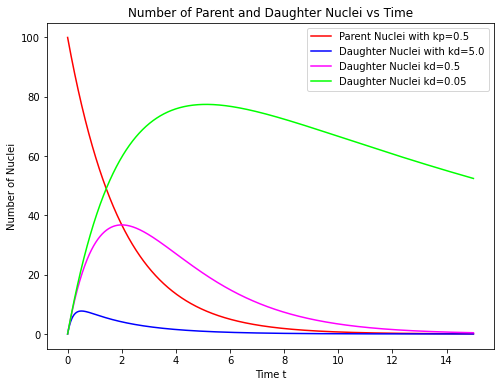

In [68]:
from numpy import arange, empty, array
import matplotlib.pyplot as plt

def RK4(f, ti, tf, h, yinit):
    '''
    Implements the fourth order Runge Kutta method for solving an initial value
      problem for a system of n ordinary differential equations. f is the vector
      function, ti and tf are the initial and final times, respectively, h is the
      step size, and yinit are the initial conditions.
    
    RK4: Func Float Float Float List(Float(s)) -> Array
    requires: ti < tf
    
    Example
    -------
    dy/dt = 5*y(t), y(0) = 0
    
    def f(t, y):
        return array([5*y[0]])
        
    RK4(f, 0.0, 1.0, 0.5, [0.0]) returns an array:
     index 0 is time values
     index [1][0] are values of y(t)
     index [1][1] are values of y'(t)
    '''  
    Nsteps = int((tf - ti)/h) # number of steps
    t = h * arange(Nsteps) # grid for the independent variable   
    y = empty([len(yinit), len(t)]) #(n, Nstep) array for the dependent variable.
    ys = array(yinit) #ys is a n-dim buffer array. Set it to the initial conditions.

    for i, ts in enumerate(t): # RK4 integrator
        y[:,i] = ys
        k1 = h*f(ts, ys)
        k2 = h*f(ts +0.5*h, ys +0.5*k1)
        k3 = h*f(ts +0.5*h, ys +0.5*k2)
        k4 = h*f(ts +h, ys +k3)
        ys += (k1+ 2*k2+ 2*k3 +k4)/6
    return t, y

class Radioactive_Decay:
    def __init__(self, kp, kd):
        self.kp, self.kd = kp, kd
    
    def f(self, t, y):
        return array([-self.kp*y[0], self.kp*y[0] - self.kd*y[1]])

init_cond = [100, 0.0]

kp = 0.5

rd1 = Radioactive_Decay(kp, 5.0)
rd2 = Radioactive_Decay(kp, 0.5)
rd3 = Radioactive_Decay(kp, 0.05)

rad_dec1 = RK4(rd1.f, 0.0, 15.0, 0.01, init_cond)
rad_dec2 = RK4(rd2.f, 0.0, 15.0, 0.01, init_cond)
rad_dec3 = RK4(rd3.f, 0.0, 15.0, 0.01, init_cond)

%matplotlib inline
plt.figure(figsize=(8,6))
plt.plot(rad_dec1[0], rad_dec1[1][0], color="red", label="Parent Nuclei with kp=0.5") ## same for every vlue of kd
plt.plot(rad_dec1[0], rad_dec1[1][1], color="blue", label="Daughter Nuclei with kd=5.0")
plt.plot(rad_dec2[0], rad_dec2[1][1], color="magenta", label="Daughter Nuclei kd=0.5")
plt.plot(rad_dec3[0], rad_dec3[1][1], color="lime", label="Daughter Nuclei kd=0.05")
plt.title('Number of Parent and Daughter Nuclei vs Time')
plt.xlabel('Time t')
plt.ylabel('Number of Nuclei')
plt.legend(loc="upper right")
plt.show()

a) The linear second-order ODE describing the motion of a harmonic oscillator is given by

$$
\frac{d^2 x}{dt^2} = -\omega^2 x.
$$

while equations of motion for anharmonic oscillators can be much more diverse and complicated. Let's consider, for example, the following form:

$$
\frac{d^2 x}{dt^2} = -\omega^2 x^3.
$$

Instead of plotting $x$ against $t$, one can plot $dx/dt$ against $x$, 
i.e., the velocity of the oscillator against its position. Such a plot is called a *phase space* plot.

Take $\omega=1$ and initial conditions $x=1$ and $dx/dt=0$ to solve both equations presented above. $t$ is in the range from $t=0$ to $t=50$. Make the phase space plots for both cases, and put them in one figure. Again put your vector function $\mathbf{f}$ in classes.

b) The *van der Pol oscillator*, which appears in electronic circuits and in laser physics, is described by the equation

$$
\frac{d^2 x}{dt^2} - \mu (1-x^2) \frac{dx}{dt} + \omega^2 x = 0.
$$

Solve this equation from $t=0$ to $t=20$ and hence make a *phase space* plot for the van der Pol oscillator with $\omega=1$,
$\mu=0.2$, and initial conditions $x=1$ and $dx/dt=0$.  Do the same also for $\mu=0.8$ and $\mu=2.5$ (still with $\omega=1$). Do not put everything on one plot; you should produce three different plots in this part. As usual, put your vector function $\mathbf{f}$ representing the righthand side of ODE's in a class.

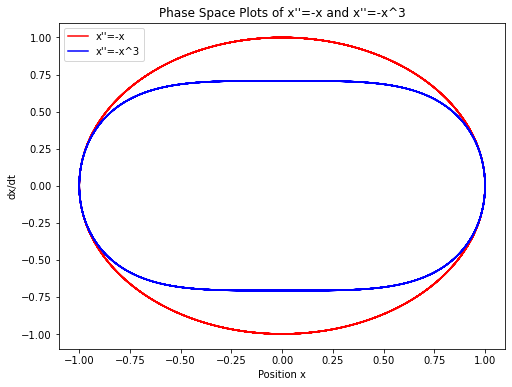

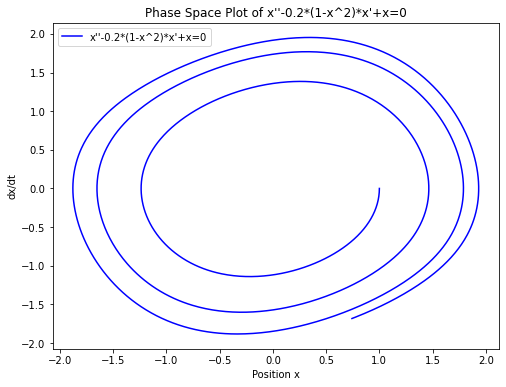

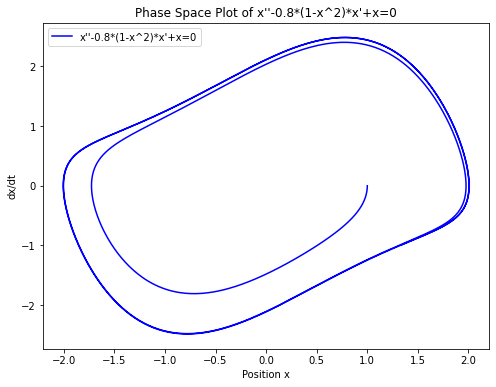

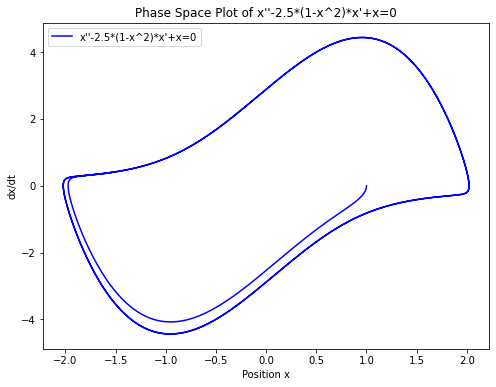

In [4]:
from numpy import arange, empty, array
import matplotlib.pyplot as plt

# a)

def RK4(f, ti, tf, h, yinit):
    '''
    Implements the fourth order Runge Kutta method for solving an initial value
      problem for a system of n ordinary differential equations. f is the vector
      function, ti and tf are the initial and final times, respectively, h is the
      step size, and yinit are the initial conditions.
    
    RK4: Func Float Float Float List(Float(s)) -> Array
    requires: ti < tf
    
    Example
    -------
    dy/dt = 5*y(t), y(0) = 0
    
    def f(t, y):
        return array([5*y[0]])
        
    RK4(f, 0.0, 1.0, 0.5, [0.0]) returns an array:
     index 0 is time values
     index [1][0] are values of y(t)
     index [1][1] are values of y'(t)
    '''    
    Nsteps = int((tf - ti)/h) # number of steps
    t = h * arange(Nsteps) # grid for the independent variable   
    y = empty([len(yinit), len(t)]) #(n, Nstep) array for the dependent variable.
    ys = array(yinit) #ys is a n-dim buffer array. Set it to the initial conditions.

    for i, ts in enumerate(t): # RK4 integrator
        y[:,i] = ys
        k1 = h*f(ts, ys)
        k2 = h*f(ts +0.5*h, ys +0.5*k1)
        k3 = h*f(ts +0.5*h, ys +0.5*k2)
        k4 = h*f(ts +h, ys +k3)
        ys += (k1+ 2*k2+ 2*k3 +k4)/6
    return t, y

class Phase_Space:
    def __init__(self, omega):
        self.omega = omega
    
    def f1(self, t, y):
        return array([y[1], -self.omega**2 * y[0]]) ## for x''=-w^2*x
    
    def f2(self, t, y):
        return array([y[1], -self.omega**2 * y[0]**3]) ## for x''=-w^2*x^3

    
init_cond = [1.0, 0.0]
omega = 1

ps = Phase_Space(omega)
phase_space1 = RK4(ps.f1, 0.0, 50.0, 0.01, init_cond)
phase_space2 = RK4(ps.f2, 0.0, 50.0, 0.01, init_cond)

%matplotlib inline
plt.figure(figsize=(8,6))
plt.plot(phase_space1[1][0], phase_space1[1][1], color="red", label="x''=-x") ## x'' = -x
plt.plot(phase_space2[1][0], phase_space2[1][1], color="blue", label="x''=-x^3") ## x'' = -x^3
plt.title("Phase Space Plots of x''=-x and x''=-x^3")
plt.xlabel('Position x')
plt.ylabel('dx/dt')
plt.legend(loc="upper left")
plt.show()


# b)

class van_der_Pol:
    def __init__(self, omega, mew):
        self.omega, self.mew = omega, mew
        
    def f(self, t, y):
        return array([y[1], self.mew*(1-y[0]**2)*y[1] - self.omega**2 * y[0]])

init_cond = [1.0, 0.0]
omega = 1

vdp1 = van_der_Pol(omega, 0.2)
vdp2 = van_der_Pol(omega, 0.8)
vdp3 = van_der_Pol(omega, 2.5)

phase_1 = RK4(vdp1.f, 0.0, 20.0, 0.01, init_cond)
phase_2 = RK4(vdp2.f, 0.0, 20.0, 0.01, init_cond)
phase_3 = RK4(vdp3.f, 0.0, 20.0, 0.01, init_cond)

plt.figure(figsize=(8,6))
plt.plot(phase_1[1][0], phase_1[1][1], color="blue", label="x''-0.2*(1-x^2)*x'+x=0") ## mew=0.2
plt.title("Phase Space Plot of x''-0.2*(1-x^2)*x'+x=0")
plt.xlabel('Position x')
plt.ylabel('dx/dt')
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(phase_2[1][0], phase_2[1][1], color="blue", label="x''-0.8*(1-x^2)*x'+x=0") ## mew=0.8
plt.title("Phase Space Plot of x''-0.8*(1-x^2)*x'+x=0")
plt.xlabel('Position x')
plt.ylabel('dx/dt')
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(phase_3[1][0], phase_3[1][1], color="blue", label="x''-2.5*(1-x^2)*x'+x=0") ## mew=2.5
plt.title("Phase Space Plot of x''-2.5*(1-x^2)*x'+x=0")
plt.xlabel('Position x')
plt.ylabel('dx/dt')
plt.legend(loc="upper left")
plt.show()